# Derive a new detector slice mask

In this notebook we use the procedure delineated in notebook 1 and notebook 2, to create the final slice maps. For each spectral band, nine slice maps are created, corresponding to nine transmission criteria (10%, 20%, ..., 80%, and 90%).

In [12]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

An example figure is shown here as a check of the code functioning.

In [1]:
import funcs
import mrsobs

import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
plt.style.use('presentation')
%matplotlib notebook

import warnings
warnings.simplefilter('ignore')

In [2]:
# Define paths to data
workDir   = '/Users/ioannisa/Desktop/python/miri_devel/'
cdpDir    = workDir+'cdp_data/'
d2cMapDir = workDir+'notebooks/distortionMaps/'
lvl2path  = workDir+'FM_data/LVL2/'

In [3]:
# load objects
sliceMap_0percent   = funcs.load_obj('sliceMap_0percent')
sliceEdges_0percent = funcs.load_obj('sliceEdges_0percent')

# initialize placeholders
transm_img,new_sliceMap,new_sliceMap_poly = {},{},{}

In [4]:
sliceMap,sci_signal,sci_signal_error = {},{},{}
for band in ['1A','1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C']: 
    # Load slice mask extension of distortion map
    d2cMaps = funcs.load_obj('d2cMaps_band{}_tr90pc'.format(band),path=d2cMapDir)
    sliceMap[band] = d2cMaps['sliceMap']
    
    # Load fringe correction map and replace NaNs by 1
    fringe_img = funcs.get_cdps(band,cdpDir,output='img')[0]
    fringe_img[np.isnan(fringe_img)] = 1
    fringe_img_error = funcs.get_cdps(band,cdpDir,output='img_error')[0]
    fringe_img_error[np.isnan(fringe_img_error)] = 0.05
    
    # Load external extended source signal
    if band == '4C':
        source_signal,bkg_signal = mrsobs.FM_MTS_BB_extended_source(lvl2path,band,bb_temp='400K',output='img')
        source_signal_error,bkg_signal_error = mrsobs.FM_MTS_BB_extended_source(lvl2path,band,bb_temp='400K',output='img_error')
        sci_signal[band] = (source_signal-bkg_signal)/fringe_img
        
        sci_signal_subtrbkg_error  = np.sqrt(source_signal_error**2 + bkg_signal_error**2)
        sci_signal_divfringe_error = np.abs(sci_signal[band]) * np.sqrt((sci_signal_subtrbkg_error / (source_signal-bkg_signal))**2 + (fringe_img_error/fringe_img)**2 )
        sci_signal_error[band] = sci_signal_divfringe_error
    else:
        source_signal,bkg_signal = mrsobs.FM_MTS_BB_extended_source(lvl2path,band,bb_temp='800K',output='img')
        source_signal_error,bkg_signal_error = mrsobs.FM_MTS_BB_extended_source(lvl2path,band,bb_temp='800K',output='img_error')
        sci_signal[band] = (source_signal-bkg_signal)/fringe_img
        
        sci_signal_subtrbkg_error  = np.sqrt(source_signal_error**2 + bkg_signal_error**2)
        sci_signal_divfringe_error = np.abs(sci_signal[band]) * np.sqrt((sci_signal_subtrbkg_error / (source_signal-bkg_signal))**2 + (fringe_img_error/fringe_img)**2 )
        sci_signal_error[band] = sci_signal_divfringe_error

In [5]:
transm_criteria = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

# load previously stored outputs
transm_img = funcs.load_obj('TransmissionImages_IntCalSource')
new_sliceMap = funcs.load_obj('NewSliceMap_DerivedFromIntCalSource')
new_sliceMap_poly = funcs.load_obj('NewSliceMapPolynomialFit_IntCalSource')

In [ ]:
#--re-run
# transm_img = {}

# for band in ['1A','1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C']:
#     if band in ['2A','3A','4A']:
#         print 'CH{} DONE'.format(int(band[0])-1)
#     transm_img[band] = funcs.get_transm_img(band,sci_signal[band],sci_signal_error[band],sliceMap_0percent[band])
# print 'CH4 DONE'

# funcs.save_obj(transm_img,'TransmissionImages_IntCalSource')

In [ ]:
#--re-run
# new_sliceMap,new_sliceMap_poly = {},{}
# for band in ['1A','1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C']:
#     if band in ['2A','3A','4A']:
#         print 'CH{} DONE'.format(int(band[0])-1)
#     new_sliceMap[band],new_sliceMap_poly[band] = {},{}
#     for transm_criterion in transm_criteria:
#         new_sliceMap[band][str(transm_criterion)] = funcs.slice_mapping(band,sliceMap_0percent[band],transm_img[band],transm_criterion=transm_criterion)
#         new_sliceMap_poly[band][str(transm_criterion)] = funcs.slice_mapping_polyfit(band,new_sliceMap[band][str(transm_criterion)])
# print 'CH4 DONE'

# funcs.save_obj(new_sliceMap,'NewSliceMap_DerivedFromIntCalSource')
# funcs.save_obj(new_sliceMap_poly,'NewSliceMapPolynomialFit_IntCalSource')

<IPython.core.display.Javascript object>


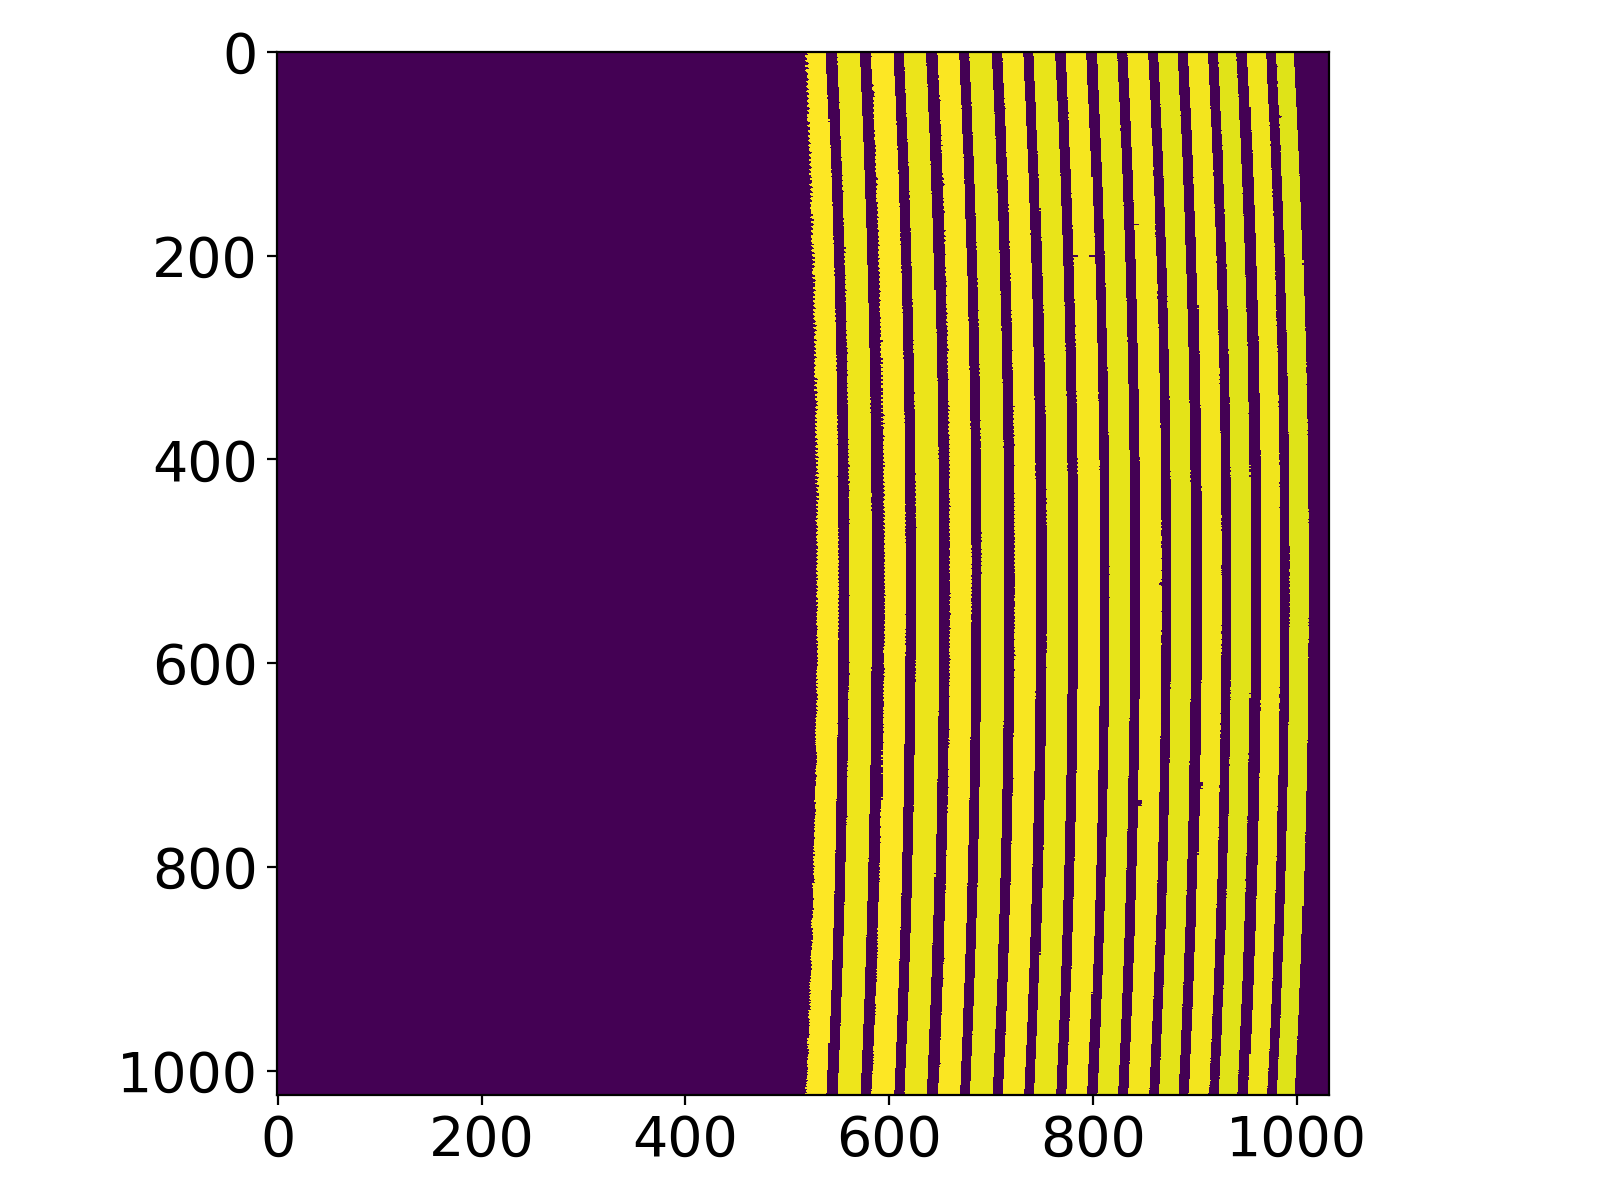

<IPython.core.display.Javascript object>


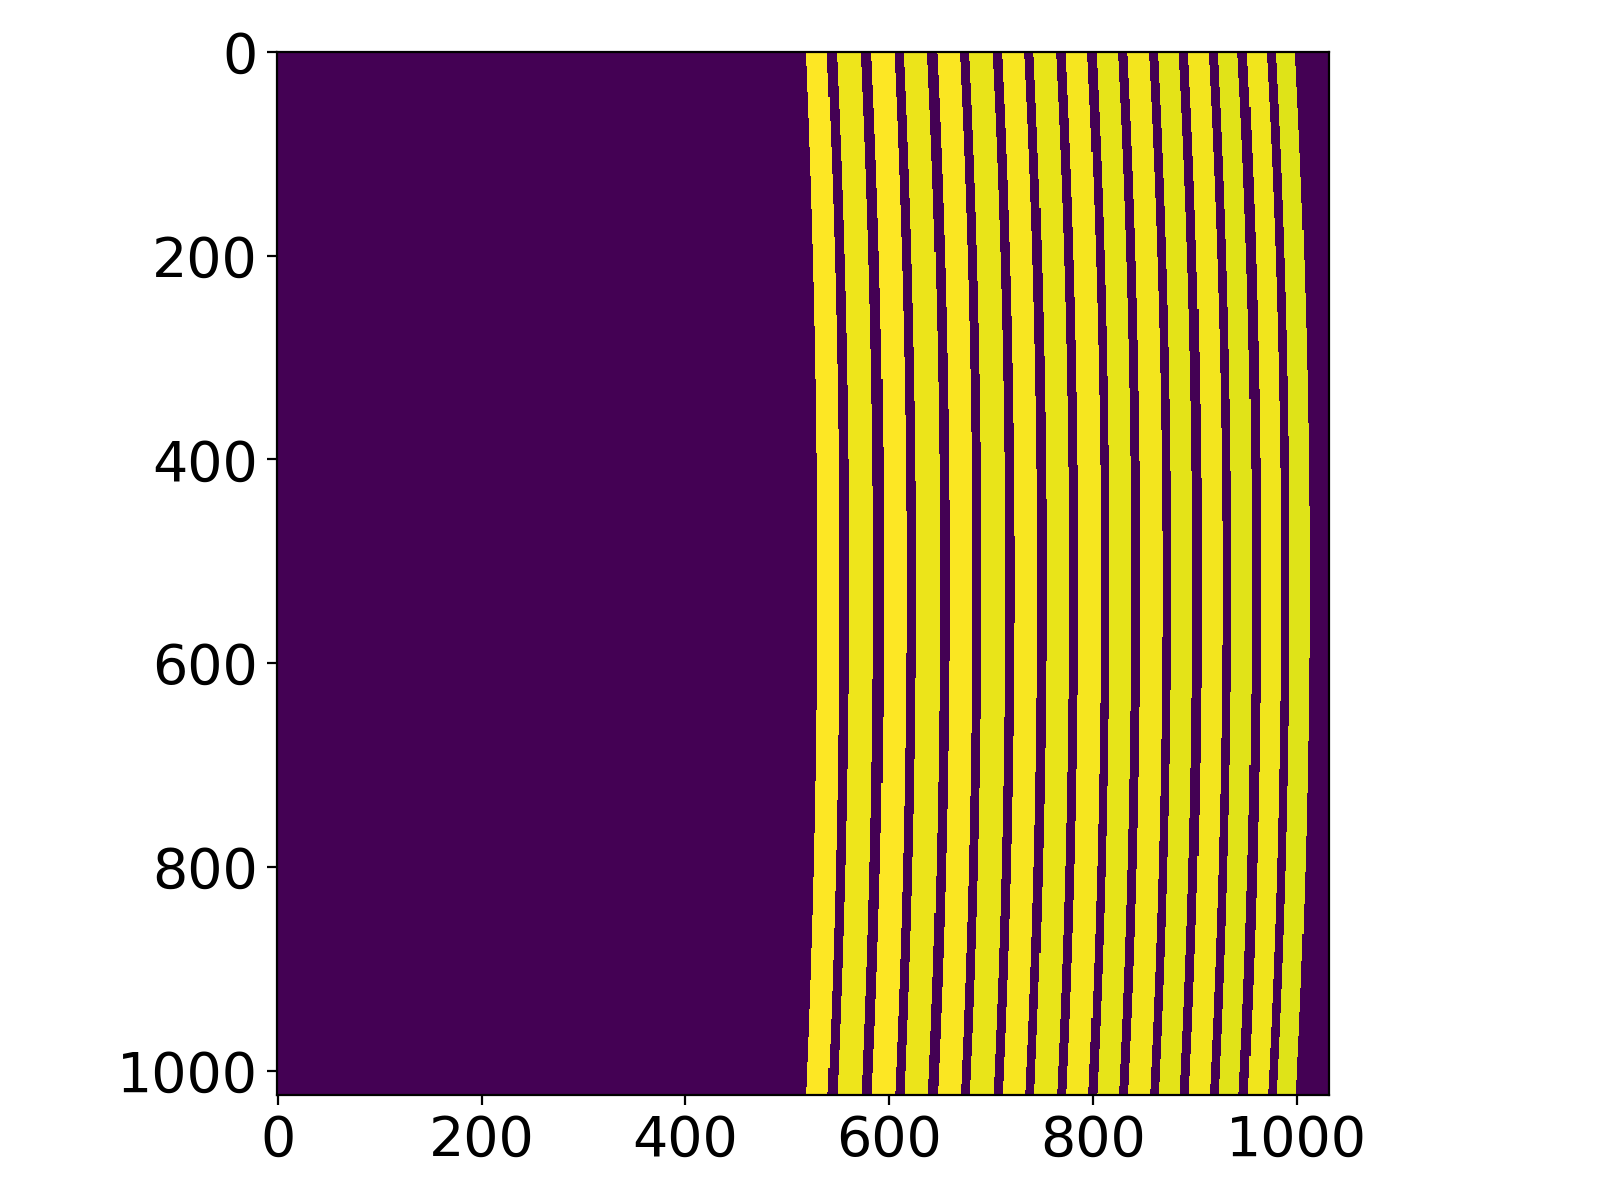

<IPython.core.display.Javascript object>


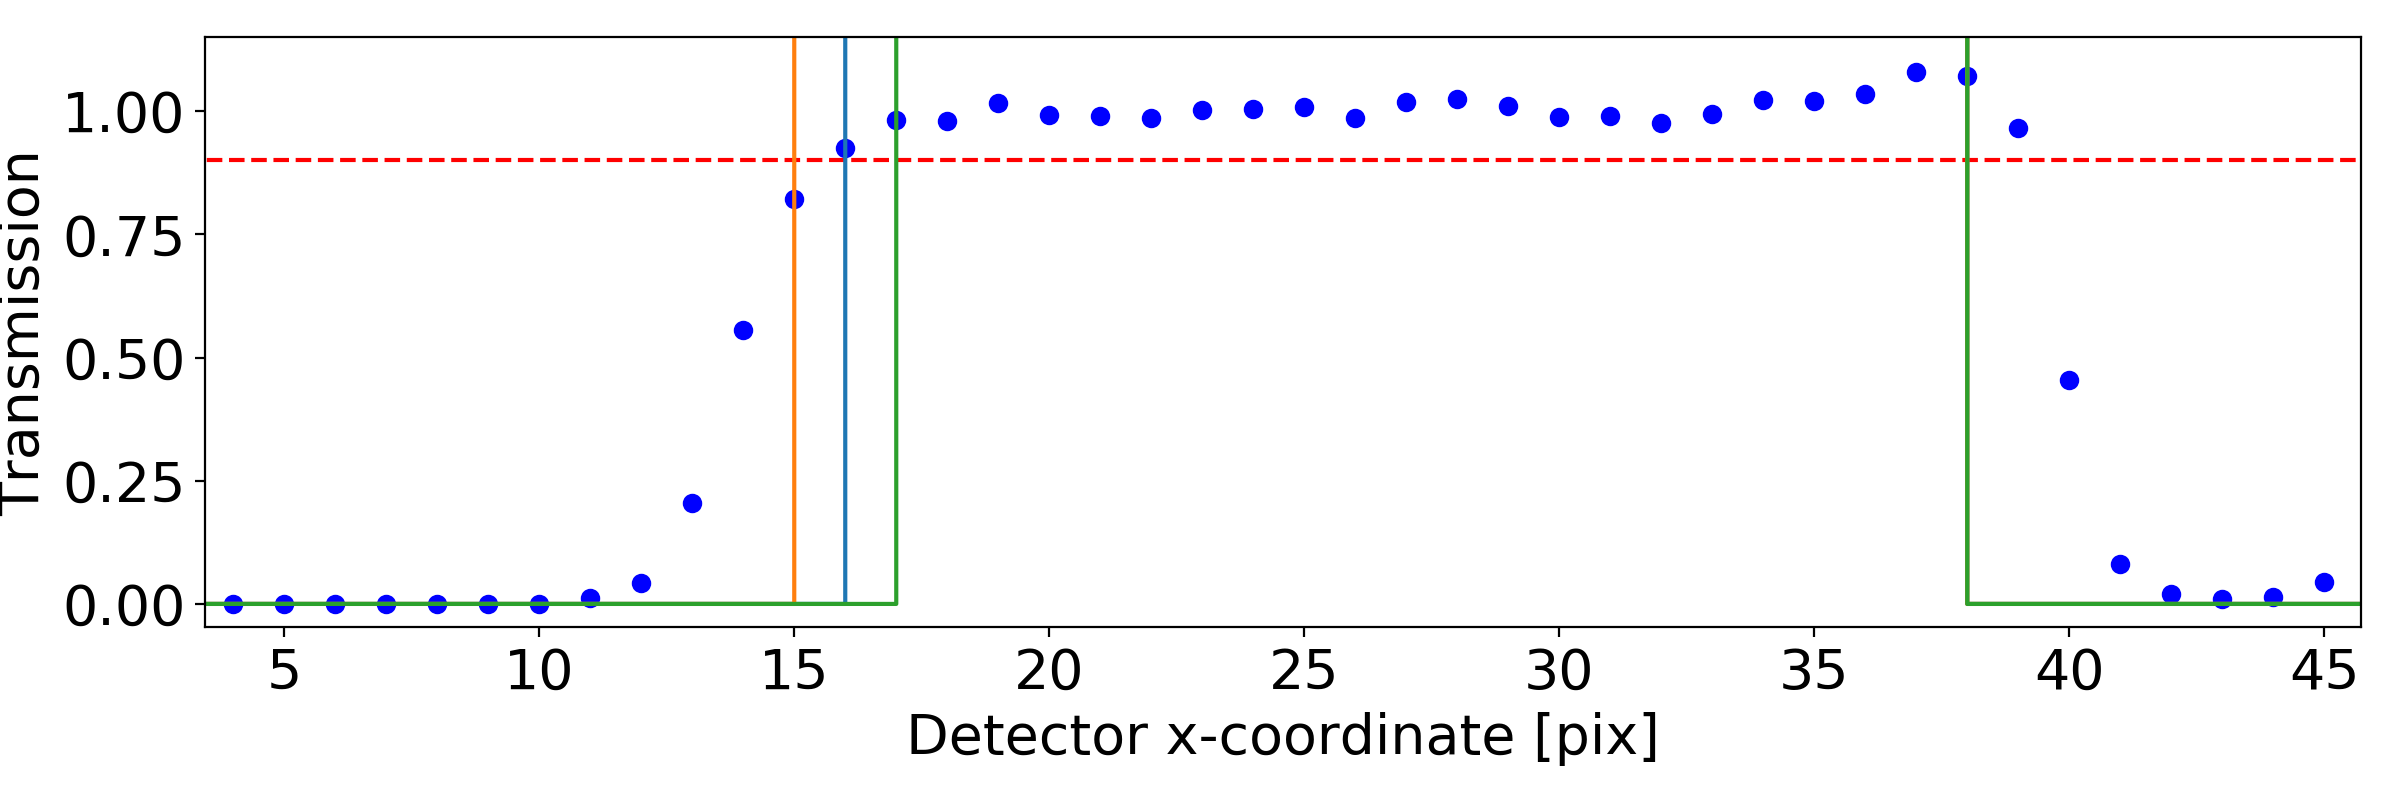

In [17]:
band = '3C'
transm_criterion = 0.9

plt.figure(figsize=(8,6))
plt.imshow(new_sliceMap[band][str(transm_criterion)])
plt.tight_layout()

plt.figure(figsize=(8,6))
plt.imshow(new_sliceMap_poly[band][str(transm_criterion)])
plt.tight_layout()

row = 512
if band[0] in ['1','4']:
    plt.figure(figsize=(12,4))
    plt.plot(np.arange(len(transm_img[band][row,:512])),transm_img[band][row,:512],'bo')
    plt.step(np.arange(len(new_sliceMap[band][str(transm_criterion)][row,:512])),new_sliceMap[band][str(transm_criterion)][row,:512])
    plt.step(np.arange(len(new_sliceMap_poly[band][str(transm_criterion)][row,:512])),new_sliceMap_poly[band][str(transm_criterion)][row,:512])
    plt.hlines(transm_criterion,0,512,'r',linestyle='dashed')
    plt.ylim(-0.05,1.3)
    plt.xlim(0,512)
    plt.xlabel('Detector x-coordinate [pix]')
    plt.ylabel('Transmission')
    plt.tight_layout()
elif band[0] in ['2','3']:
    plt.figure(figsize=(12,4))
    plt.plot(np.arange(len(transm_img[band][row,512:])),transm_img[band][row,512:],'bo')
    plt.step(np.arange(len(new_sliceMap[band][str(transm_criterion)][row,512:])),new_sliceMap[band][str(transm_criterion)][row,512:])
    plt.step(np.arange(len(sliceMap[band][row,512:])),sliceMap[band][row,512:])
    plt.step(np.arange(len(new_sliceMap_poly[band][str(transm_criterion)][row,512:])),new_sliceMap_poly[band][str(transm_criterion)][row,512:])
    
    plt.hlines(transm_criterion,0,512,'r',linestyle='dashed')
    plt.ylim(-0.05,1.3)
    plt.xlim(0,512)
    plt.xlabel('Detector x-coordinate [pix]')
    plt.ylabel('Transmission')
    plt.tight_layout()

In [18]:
# save responses to CDP
outDir = cdpDir+"CDP8/"

def makeHeader(detector, channel, band):
    hdu0 = fits.PrimaryHDU()
    hdu0.header["TELESCOP"]="JWST"
    hdu0.header["INSTRUME"]="MIRI"
    hdu0.header["MODELNAM"]=("FM", "Instrument model name")
    hdu0.header["DETECTOR"]=detector
    hdu0.header["DETSETNG"]="ANY"
    hdu0.header["READPATT"]="ANY"
    hdu0.header["SUBARRAY"]="GENERIC"
    hdu0.header["SUBSTRT1"]= 1                                            
    hdu0.header["SUBSIZE1"]= 1032                                              
    hdu0.header["SUBSTRT2"]= 1                                                
    hdu0.header["SUBSIZE2"]= 1024                                           
    hdu0.header["FASTAXIS"]= 1                                               
    hdu0.header["SLOWAXIS"]= 2
    hdu0.header["CHANNEL"] = channel
    hdu0.header["BAND"]    = band
    hdu0.header["FILENAME"]= "MIRI_FM_"+detector+"_"+channel+band+"_SLICEMAP_8B.00.00.fits"
    hdu0.header["DATE"]="2019-06-13"
    hdu0.header["VERSION"] ="8B.00.00"
    hdu0.header["USEAFTER"] ="2000-01-01T00:00:00"
    hdu0.header["AUTHOR"]  ="Ioannis Argyriou and Bart Vandenbussche"
    hdu0.header["COAUTHOR"]  ="Adrian Glauser and Polychronis Patapis"
    hdu0.header["ORIGIN"]  = "MIRI European Consortium"
    hdu0.header["EXP_TYPE"]= "MIR_MRS"
    hdu0.header["REFTYPE"] ="SLICEMAP"
    hdu0.header["DESCRIP"] = 'CDP-8 MIRI MRS detector slice map'
    hdu0.header["PEDIGREE"] = 'GROUND'
    hdu0.header.add_history("DOCUMENT: MIRI-TN-00005-KUL Issue 1.0")
    hdu0.header.add_history("SOFTWARE: MIRICLE ")
    hdu0.header.add_history("DATA USED: RAL FM data obsId 12688")
    return hdu0

# Band 1A/2A

In [19]:
# save outputs
detector  = "MIRIFUSHORT"
if detector[6:] == 'SHORT':  channel = '12'
elif detector[6:] == 'LONG': channel = '34'
band = 'SHORT'
hdu0 = makeHeader(detector, channel, band)

sliceMap_10percent = new_sliceMap_poly['1A']['0.1']+new_sliceMap_poly['2A']['0.1']
sliceMap_20percent = new_sliceMap_poly['1A']['0.2']+new_sliceMap_poly['2A']['0.2']
sliceMap_30percent = new_sliceMap_poly['1A']['0.3']+new_sliceMap_poly['2A']['0.3']
sliceMap_40percent = new_sliceMap_poly['1A']['0.4']+new_sliceMap_poly['2A']['0.4']
sliceMap_50percent = new_sliceMap_poly['1A']['0.5']+new_sliceMap_poly['2A']['0.5']
sliceMap_60percent = new_sliceMap_poly['1A']['0.6']+new_sliceMap_poly['2A']['0.6']
sliceMap_70percent = new_sliceMap_poly['1A']['0.7']+new_sliceMap_poly['2A']['0.7']
sliceMap_80percent = new_sliceMap_poly['1A']['0.8']+new_sliceMap_poly['2A']['0.8']
sliceMap_90percent = new_sliceMap_poly['1A']['0.9']+new_sliceMap_poly['2A']['0.9']

hdu1 = fits.ImageHDU(data=sliceMap_10percent, header=None, name="Slice_Map_10%")
hdu2 = fits.ImageHDU(data=sliceMap_20percent, header=None, name="Slice_Map_20%")
hdu3 = fits.ImageHDU(data=sliceMap_30percent, header=None, name="Slice_Map_30%")
hdu4 = fits.ImageHDU(data=sliceMap_40percent, header=None, name="Slice_Map_40%")
hdu5 = fits.ImageHDU(data=sliceMap_50percent, header=None, name="Slice_Map_50%")
hdu6 = fits.ImageHDU(data=sliceMap_60percent, header=None, name="Slice_Map_60%")
hdu7 = fits.ImageHDU(data=sliceMap_70percent, header=None, name="Slice_Map_70%")
hdu8 = fits.ImageHDU(data=sliceMap_80percent, header=None, name="Slice_Map_80%")
hdu9 = fits.ImageHDU(data=sliceMap_90percent, header=None, name="Slice_Map_90%")

hdulist = fits.HDUList([hdu0,hdu1,hdu2,hdu3,hdu4,hdu5,hdu6,hdu7,hdu8,hdu9])
hdulist.writeto(outDir + "MIRI_FM_{}_{}{}_SLICEMAP_8B.00.00.fits".format(detector,channel,band),overwrite=True)

# Band 1B/2B

In [20]:
# save outputs
detector  = "MIRIFUSHORT"
if detector[6:] == 'SHORT':  channel = '12'
elif detector[6:] == 'LONG': channel = '34'
band = 'MEDIUM'
hdu0 = makeHeader(detector, channel, band)

sliceMap_10percent = new_sliceMap_poly['1B']['0.1']+new_sliceMap_poly['2B']['0.1']
sliceMap_20percent = new_sliceMap_poly['1B']['0.2']+new_sliceMap_poly['2B']['0.2']
sliceMap_30percent = new_sliceMap_poly['1B']['0.3']+new_sliceMap_poly['2B']['0.3']
sliceMap_40percent = new_sliceMap_poly['1B']['0.4']+new_sliceMap_poly['2B']['0.4']
sliceMap_50percent = new_sliceMap_poly['1B']['0.5']+new_sliceMap_poly['2B']['0.5']
sliceMap_60percent = new_sliceMap_poly['1B']['0.6']+new_sliceMap_poly['2B']['0.6']
sliceMap_70percent = new_sliceMap_poly['1B']['0.7']+new_sliceMap_poly['2B']['0.7']
sliceMap_80percent = new_sliceMap_poly['1B']['0.8']+new_sliceMap_poly['2B']['0.8']
sliceMap_90percent = new_sliceMap_poly['1B']['0.9']+new_sliceMap_poly['2B']['0.9']

hdu1 = fits.ImageHDU(data=sliceMap_10percent, header=None, name="Slice_Map_10%")
hdu2 = fits.ImageHDU(data=sliceMap_20percent, header=None, name="Slice_Map_20%")
hdu3 = fits.ImageHDU(data=sliceMap_30percent, header=None, name="Slice_Map_30%")
hdu4 = fits.ImageHDU(data=sliceMap_40percent, header=None, name="Slice_Map_40%")
hdu5 = fits.ImageHDU(data=sliceMap_50percent, header=None, name="Slice_Map_50%")
hdu6 = fits.ImageHDU(data=sliceMap_60percent, header=None, name="Slice_Map_60%")
hdu7 = fits.ImageHDU(data=sliceMap_70percent, header=None, name="Slice_Map_70%")
hdu8 = fits.ImageHDU(data=sliceMap_80percent, header=None, name="Slice_Map_80%")
hdu9 = fits.ImageHDU(data=sliceMap_90percent, header=None, name="Slice_Map_90%")

hdulist = fits.HDUList([hdu0,hdu1,hdu2,hdu3,hdu4,hdu5,hdu6,hdu7,hdu8,hdu9])
hdulist.writeto(outDir + "MIRI_FM_{}_{}{}_SLICEMAP_8B.00.00.fits".format(detector,channel,band),overwrite=True)

# Band 1C/2C

In [21]:
# save outputs
detector  = "MIRIFUSHORT"
if detector[6:] == 'SHORT':  channel = '12'
elif detector[6:] == 'LONG': channel = '34'
band = 'LONG'
hdu0 = makeHeader(detector, channel, band)

sliceMap_10percent = new_sliceMap_poly['1C']['0.1']+new_sliceMap_poly['2C']['0.1']
sliceMap_20percent = new_sliceMap_poly['1C']['0.2']+new_sliceMap_poly['2C']['0.2']
sliceMap_30percent = new_sliceMap_poly['1C']['0.3']+new_sliceMap_poly['2C']['0.3']
sliceMap_40percent = new_sliceMap_poly['1C']['0.4']+new_sliceMap_poly['2C']['0.4']
sliceMap_50percent = new_sliceMap_poly['1C']['0.5']+new_sliceMap_poly['2C']['0.5']
sliceMap_60percent = new_sliceMap_poly['1C']['0.6']+new_sliceMap_poly['2C']['0.6']
sliceMap_70percent = new_sliceMap_poly['1C']['0.7']+new_sliceMap_poly['2C']['0.7']
sliceMap_80percent = new_sliceMap_poly['1C']['0.8']+new_sliceMap_poly['2C']['0.8']
sliceMap_90percent = new_sliceMap_poly['1C']['0.9']+new_sliceMap_poly['2C']['0.9']

hdu1 = fits.ImageHDU(data=sliceMap_10percent, header=None, name="Slice_Map_10%")
hdu2 = fits.ImageHDU(data=sliceMap_20percent, header=None, name="Slice_Map_20%")
hdu3 = fits.ImageHDU(data=sliceMap_30percent, header=None, name="Slice_Map_30%")
hdu4 = fits.ImageHDU(data=sliceMap_40percent, header=None, name="Slice_Map_40%")
hdu5 = fits.ImageHDU(data=sliceMap_50percent, header=None, name="Slice_Map_50%")
hdu6 = fits.ImageHDU(data=sliceMap_60percent, header=None, name="Slice_Map_60%")
hdu7 = fits.ImageHDU(data=sliceMap_70percent, header=None, name="Slice_Map_70%")
hdu8 = fits.ImageHDU(data=sliceMap_80percent, header=None, name="Slice_Map_80%")
hdu9 = fits.ImageHDU(data=sliceMap_90percent, header=None, name="Slice_Map_90%")

hdulist = fits.HDUList([hdu0,hdu1,hdu2,hdu3,hdu4,hdu5,hdu6,hdu7,hdu8,hdu9])
hdulist.writeto(outDir + "MIRI_FM_{}_{}{}_SLICEMAP_8B.00.00.fits".format(detector,channel,band),overwrite=True)

# Band 3A/4A

In [22]:
# save outputs
detector  = "MIRIFULONG"
if detector[6:] == 'SHORT':  channel = '12'
elif detector[6:] == 'LONG': channel = '34'
band = 'SHORT'
hdu0 = makeHeader(detector, channel, band)

sliceMap_10percent = new_sliceMap_poly['3A']['0.1']+new_sliceMap_poly['4A']['0.1']
sliceMap_20percent = new_sliceMap_poly['3A']['0.2']+new_sliceMap_poly['4A']['0.2']
sliceMap_30percent = new_sliceMap_poly['3A']['0.3']+new_sliceMap_poly['4A']['0.3']
sliceMap_40percent = new_sliceMap_poly['3A']['0.4']+new_sliceMap_poly['4A']['0.4']
sliceMap_50percent = new_sliceMap_poly['3A']['0.5']+new_sliceMap_poly['4A']['0.5']
sliceMap_60percent = new_sliceMap_poly['3A']['0.6']+new_sliceMap_poly['4A']['0.6']
sliceMap_70percent = new_sliceMap_poly['3A']['0.7']+new_sliceMap_poly['4A']['0.7']
sliceMap_80percent = new_sliceMap_poly['3A']['0.8']+new_sliceMap_poly['4A']['0.8']
sliceMap_90percent = new_sliceMap_poly['3A']['0.9']+new_sliceMap_poly['4A']['0.9']

hdu1 = fits.ImageHDU(data=sliceMap_10percent, header=None, name="Slice_Map_10%")
hdu2 = fits.ImageHDU(data=sliceMap_20percent, header=None, name="Slice_Map_20%")
hdu3 = fits.ImageHDU(data=sliceMap_30percent, header=None, name="Slice_Map_30%")
hdu4 = fits.ImageHDU(data=sliceMap_40percent, header=None, name="Slice_Map_40%")
hdu5 = fits.ImageHDU(data=sliceMap_50percent, header=None, name="Slice_Map_50%")
hdu6 = fits.ImageHDU(data=sliceMap_60percent, header=None, name="Slice_Map_60%")
hdu7 = fits.ImageHDU(data=sliceMap_70percent, header=None, name="Slice_Map_70%")
hdu8 = fits.ImageHDU(data=sliceMap_80percent, header=None, name="Slice_Map_80%")
hdu9 = fits.ImageHDU(data=sliceMap_90percent, header=None, name="Slice_Map_90%")

hdulist = fits.HDUList([hdu0,hdu1,hdu2,hdu3,hdu4,hdu5,hdu6,hdu7,hdu8,hdu9])
hdulist.writeto(outDir + "MIRI_FM_{}_{}{}_SLICEMAP_8B.00.00.fits".format(detector,channel,band),overwrite=True)

# Band 3B/4B

In [23]:
# save outputs
detector  = "MIRIFULONG"
if detector[6:] == 'SHORT':  channel = '12'
elif detector[6:] == 'LONG': channel = '34'
band = 'MEDIUM'
hdu0 = makeHeader(detector, channel, band)

sliceMap_10percent = new_sliceMap_poly['3B']['0.1']+new_sliceMap_poly['4B']['0.1']
sliceMap_20percent = new_sliceMap_poly['3B']['0.2']+new_sliceMap_poly['4B']['0.2']
sliceMap_30percent = new_sliceMap_poly['3B']['0.3']+new_sliceMap_poly['4B']['0.3']
sliceMap_40percent = new_sliceMap_poly['3B']['0.4']+new_sliceMap_poly['4B']['0.4']
sliceMap_50percent = new_sliceMap_poly['3B']['0.5']+new_sliceMap_poly['4B']['0.5']
sliceMap_60percent = new_sliceMap_poly['3B']['0.6']+new_sliceMap_poly['4B']['0.6']
sliceMap_70percent = new_sliceMap_poly['3B']['0.7']+new_sliceMap_poly['4B']['0.7']
sliceMap_80percent = new_sliceMap_poly['3B']['0.8']+new_sliceMap_poly['4B']['0.8']
sliceMap_90percent = new_sliceMap_poly['3B']['0.9']+new_sliceMap_poly['4B']['0.9']

hdu1 = fits.ImageHDU(data=sliceMap_10percent, header=None, name="Slice_Map_10%")
hdu2 = fits.ImageHDU(data=sliceMap_20percent, header=None, name="Slice_Map_20%")
hdu3 = fits.ImageHDU(data=sliceMap_30percent, header=None, name="Slice_Map_30%")
hdu4 = fits.ImageHDU(data=sliceMap_40percent, header=None, name="Slice_Map_40%")
hdu5 = fits.ImageHDU(data=sliceMap_50percent, header=None, name="Slice_Map_50%")
hdu6 = fits.ImageHDU(data=sliceMap_60percent, header=None, name="Slice_Map_60%")
hdu7 = fits.ImageHDU(data=sliceMap_70percent, header=None, name="Slice_Map_70%")
hdu8 = fits.ImageHDU(data=sliceMap_80percent, header=None, name="Slice_Map_80%")
hdu9 = fits.ImageHDU(data=sliceMap_90percent, header=None, name="Slice_Map_90%")

hdulist = fits.HDUList([hdu0,hdu1,hdu2,hdu3,hdu4,hdu5,hdu6,hdu7,hdu8,hdu9])
hdulist.writeto(outDir + "MIRI_FM_{}_{}{}_SLICEMAP_8B.00.00.fits".format(detector,channel,band),overwrite=True)

# Band 3C/4C

In [24]:
# save outputs
detector  = "MIRIFULONG"
if detector[6:] == 'SHORT':  channel = '12'
elif detector[6:] == 'LONG': channel = '34'
band = 'LONG'
hdu0 = makeHeader(detector, channel, band)

sliceMap_10percent = new_sliceMap_poly['3C']['0.1']+new_sliceMap_poly['4C']['0.1']
sliceMap_20percent = new_sliceMap_poly['3C']['0.2']+new_sliceMap_poly['4C']['0.2']
sliceMap_30percent = new_sliceMap_poly['3C']['0.3']+new_sliceMap_poly['4C']['0.3']
sliceMap_40percent = new_sliceMap_poly['3C']['0.4']+new_sliceMap_poly['4C']['0.4']
sliceMap_50percent = new_sliceMap_poly['3C']['0.5']+new_sliceMap_poly['4C']['0.5']
sliceMap_60percent = new_sliceMap_poly['3C']['0.6']+new_sliceMap_poly['4C']['0.6']
sliceMap_70percent = new_sliceMap_poly['3C']['0.7']+new_sliceMap_poly['4C']['0.7']
sliceMap_80percent = new_sliceMap_poly['3C']['0.8']+new_sliceMap_poly['4C']['0.8']
sliceMap_90percent = new_sliceMap_poly['3C']['0.9']+new_sliceMap_poly['4C']['0.9']

hdu1 = fits.ImageHDU(data=sliceMap_10percent, header=None, name="Slice_Map_10%")
hdu2 = fits.ImageHDU(data=sliceMap_20percent, header=None, name="Slice_Map_20%")
hdu3 = fits.ImageHDU(data=sliceMap_30percent, header=None, name="Slice_Map_30%")
hdu4 = fits.ImageHDU(data=sliceMap_40percent, header=None, name="Slice_Map_40%")
hdu5 = fits.ImageHDU(data=sliceMap_50percent, header=None, name="Slice_Map_50%")
hdu6 = fits.ImageHDU(data=sliceMap_60percent, header=None, name="Slice_Map_60%")
hdu7 = fits.ImageHDU(data=sliceMap_70percent, header=None, name="Slice_Map_70%")
hdu8 = fits.ImageHDU(data=sliceMap_80percent, header=None, name="Slice_Map_80%")
hdu9 = fits.ImageHDU(data=sliceMap_90percent, header=None, name="Slice_Map_90%")

hdulist = fits.HDUList([hdu0,hdu1,hdu2,hdu3,hdu4,hdu5,hdu6,hdu7,hdu8,hdu9])
hdulist.writeto(outDir + "MIRI_FM_{}_{}{}_SLICEMAP_8B.00.00.fits".format(detector,channel,band),overwrite=True)